# Homework 1 Yalin Liao

# Problem 1
The overal goal is to generate data based on the description in Bach's "Bolasso: Model
Consistent Lasso Estimation through Bootstrap" section 4.1. Steps: (preparation steps)

**1)**

In [1]:
import numpy as np
np.random.seed(0)

In [2]:
p=32
G_ = np.random.normal(0,1,size=(p,p))
print(G_.shape)
print(G_)

(32, 32)
[[ 1.76405235  0.40015721  0.97873798 ...  1.46935877  0.15494743
   0.37816252]
 [-0.88778575 -1.98079647 -0.34791215 ... -0.35955316 -0.81314628
  -1.7262826 ]
 [ 0.17742614 -0.40178094 -1.63019835 ...  0.97663904  0.3563664
   0.70657317]
 ...
 [ 0.36448125  1.47132196  1.59277075 ... -0.80475374  2.34664703
  -1.27916111]
 [-0.36555109  0.93809254  0.29673317 ... -0.30309825  0.44103291
   0.17879287]
 [-0.7994224   0.24078751  0.28912051 ...  0.70104134 -0.41747735
  -1.09749665]]


**2)**

In [3]:
norm = np.sqrt((G_ * G_).sum(axis=1))
print(norm.shape)
norm = norm.reshape(-1,1)
print(norm.shape)
G = G_ / norm
print("The resulting matrix",G)

(32,)
(32, 1)
The resulting matrix [[ 0.27495727  0.06237124  0.1525528  ...  0.22902431  0.02415117
   0.058943  ]
 [-0.15994312 -0.35685948 -0.06267971 ... -0.06477695 -0.1464961
  -0.31100637]
 [ 0.03440013 -0.07789898 -0.31606973 ...  0.1893549   0.06909382
   0.13699339]
 ...
 [ 0.06028031  0.24333694  0.26342294 ... -0.13309549  0.38810398
  -0.21155611]
 [-0.08255779  0.21186327  0.06701563 ... -0.06845315  0.09960497
   0.04037943]
 [-0.17429627  0.05249836  0.06303629 ...  0.15284647 -0.09102165
  -0.23928473]]


In [4]:
# test whether normaliz rows correctly
for i in range(5):
    print(np.linalg.norm(G[i,:]))

0.9999999999999999
1.0
1.0
1.0
1.0


**3)**

In [5]:
Q = G@G.T
print(Q)

[[ 1.00000000e+00 -1.55742343e-01 -2.38847326e-01 ...  1.42903927e-01
   4.98537482e-03  8.19186933e-02]
 [-1.55742343e-01  1.00000000e+00 -1.67725065e-01 ... -1.49833064e-01
  -2.10245761e-01 -1.05671887e-01]
 [-2.38847326e-01 -1.67725065e-01  1.00000000e+00 ... -4.19251306e-01
  -4.40601142e-04 -2.04923566e-01]
 ...
 [ 1.42903927e-01 -1.49833064e-01 -4.19251306e-01 ...  1.00000000e+00
   1.31860370e-01  7.89813166e-02]
 [ 4.98537482e-03 -2.10245761e-01 -4.40601142e-04 ...  1.31860370e-01
   1.00000000e+00  1.10489748e-01]
 [ 8.19186933e-02 -1.05671887e-01 -2.04923566e-01 ...  7.89813166e-02
   1.10489748e-01  1.00000000e+00]]


In [6]:
n = 1000
mean = [0]*p
cov = Q
X = np.random.multivariate_normal(mean, cov, size=n)
print(X.shape)
print(X)

(1000, 32)
[[-1.06892683 -0.3709432   1.97605874 ... -1.71322821 -1.12762967
  -0.7862105 ]
 [ 0.17877955 -1.20114629  0.19229697 ...  0.50618445 -0.81174716
  -0.03880036]
 [-1.71414171  1.19192674  0.75173935 ... -0.5465999  -0.56656309
  -0.12116331]
 ...
 [ 0.33520567  1.05744767  0.2923525  ...  0.37510521 -0.34418801
   0.22327616]
 [ 0.08233926  1.17174643  0.36143915 ...  0.82568941  1.06632058
   0.394419  ]
 [ 1.50444587  1.31264121 -0.63451871 ...  0.40277819 -0.25639464
   1.19595985]]


The $i$-th row of $X$ is $x_i$.

In [7]:
# empirical mean
mean_ = X.mean(axis=0)
print(mean_)

[ 0.01971809  0.0136108  -0.00265989  0.02449584  0.03360005  0.02407988
 -0.02731664  0.02029721 -0.02407266  0.00544342 -0.02347969  0.00511705
 -0.03018018  0.03980385 -0.01456687 -0.0365506  -0.03835097  0.00478812
 -0.00449377 -0.03548759 -0.01346445 -0.00456607  0.01961206 -0.04507968
  0.00585111 -0.0013046  -0.01963728 -0.04244565 -0.03486596  0.01273795
  0.00243403 -0.00779144]


In [8]:
# empirical covariance
Q_ = np.cov(X.T)
print(Q_.shape)
print(Q_)

(32, 32)
[[ 0.97897517 -0.12496324 -0.2752325  ...  0.19370824  0.00221818
   0.10973667]
 [-0.12496324  0.99933955 -0.20667661 ... -0.16621468 -0.21682752
  -0.02593616]
 [-0.2752325  -0.20667661  1.07482998 ... -0.43566686  0.03928203
  -0.2071442 ]
 ...
 [ 0.19370824 -0.16621468 -0.43566686 ...  1.00512704  0.16248054
   0.05927308]
 [ 0.00221818 -0.21682752  0.03928203 ...  0.16248054  0.95290288
   0.05020172]
 [ 0.10973667 -0.02593616 -0.2071442  ...  0.05927308  0.05020172
   1.01951395]]


In [9]:
print(Q-Q_)

[[ 0.02102483 -0.0307791   0.03638518 ... -0.05080432  0.00276719
  -0.02781798]
 [-0.0307791   0.00066045  0.03895155 ...  0.01638161  0.00658176
  -0.07973573]
 [ 0.03638518  0.03895155 -0.07482998 ...  0.01641555 -0.03972264
   0.00222063]
 ...
 [-0.05080432  0.01638161  0.01641555 ... -0.00512704 -0.03062018
   0.01970823]
 [ 0.00276719  0.00658176 -0.03972264 ... -0.03062018  0.04709712
   0.06028803]
 [-0.02781798 -0.07973573  0.00222063 ...  0.01970823  0.06028803
  -0.01951395]]


**4)**

Now consider $Y = w^⊤X + \epsilon$, where $w$ is a random vector (that is fixed across the sample) and
$\epsilon\sim\mathcal{N}(0, \sigma^2)$.

Note $w$ is defined in 5) and $\sigma$ is given in step 6).

**5)** $r=8, P(s_i=1)=P(s_i=-1)=0.5$

In [10]:
w = np.zeros((p,1))
print(w.shape)

(32, 1)


In [11]:
# change to the first r weight to nonzeros
r = 8
for i in range(r):
    w_ = np.random.uniform(1/3,1)
    # print(w_)
    s = 2*np.random.binomial(1,0.5)-1
    # print(s)
    w[i] = s*w_

In [12]:
print(w[0:15])

[[ 0.36432789]
 [-0.40241421]
 [-0.86805836]
 [ 0.9276578 ]
 [-0.59106088]
 [-0.58045346]
 [ 0.65647477]
 [ 0.33770857]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]


**6)** The noise variance is dependent on $w^TQw$, specially, $\sigma=0.1\sqrt{w^TQw}$.

In [13]:
sigma = 0.1*np.sqrt(w.T@Q@w)
print(sigma)

[[0.1886595]]


In [14]:
# generate noise epsilon
epsilon = np.random.normal(0,sigma,size=(n,1))
print(epsilon.shape)
print(epsilon[0:5])

(1000, 1)
[[-0.07421385]
 [-0.05433112]
 [ 0.31944921]
 [-0.05033104]
 [-0.08068262]]


**7)** The end result are tuples consisting of a vector in $R^p$ and regression target in 
$R,\{x_i,y_i\}_{i=1}^n$.

In [15]:
Y_ = X@w + epsilon
print(Y_.shape)
print(Y_[0:5])

(1000, 1)
[[-2.80446701]
 [-0.49903215]
 [-4.39436911]
 [-2.11197232]
 [-0.88303498]]


Note that $Y$ is defined in the 8).

**8)** Consider a simple classification scheme.

In [16]:
eta = -1.5
Y = np.sign(Y_ + eta)
print(Y.shape)
print(Y[0:15])

(1000, 1)
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]


In [17]:
# Combine X and Y into a list, whose elements are tuples (x_i,y_i)
X_Y = [(X[i,:],Y[i]) for i in range(n)]
print(X_Y[0])
print(X_Y[1][0])
print(X_Y[1][1])

(array([-1.06892683, -0.3709432 ,  1.97605874, -1.07756785, -0.67310614,
       -0.04576485,  0.60560555, -1.76813233,  0.65661681, -1.29003445,
       -0.54286343, -1.41555855,  0.35969639, -0.44585397,  0.99397141,
       -0.12472047,  1.07610625, -0.48811589, -0.65699088,  1.00695644,
       -0.29544815,  1.32984711, -0.65557881,  1.26777075,  0.91073575,
        1.20636756,  0.46235262,  1.59350378, -0.02666786, -1.71322821,
       -1.12762967, -0.7862105 ]), array([-1.]))
[ 0.17877955 -1.20114629  0.19229697  0.21275522 -0.19880655  0.23895686
 -0.98068305 -1.06198831  0.65999552  0.63736315 -0.25419287 -0.14839333
 -0.50151437  0.41474629 -0.08400394 -0.09299017 -1.37238306  1.23815385
 -1.81118316  0.37717494  0.9664543  -1.74432142  0.50890541 -0.8766971
 -0.45495221 -0.37154975 -1.28671301 -0.39803036  0.97302575  0.50618445
 -0.81174716 -0.03880036]
[-1.]


**9)** For class $1$, find the instance $i^*$ with the maximum value of regression value $y_{i^*} =\max_{i\in{1,\cdots,n}}y_i$; it will serve as the class $1$ prototype. You will consider the distance from this prototype point $x_{i*}$ to the remaining $n-1$ instances.

In [18]:
i_star = np.argmax(Y_)
print(Y_[i_star,0])
print(np.max(Y_))

7.884908527913237
7.884908527913237


In [19]:
print("class 1 prototype:", i_star)
print("class 1 prototype point:", X[i_star,:])

class 1 prototype: 7
class 1 prototype point: [ 1.93753967 -0.882708   -0.6150145   2.62337944 -1.48539406 -1.85205008
  3.03429779  0.39547777 -0.36113352  0.29677414  0.24541022 -0.22689234
  0.18330941 -1.58949969  0.76623588  1.84099777  0.08238738  0.21535237
 -0.94552818 -0.83781491 -0.47037725  1.85192961 -0.1144072   1.01949923
  0.25608209  1.13939144  0.33164836 -0.91873736  0.22306375 -1.02115997
  1.37750811  0.04847395]


### Deliverables:

**1)** Human Human readable code to correctly generate a sample and identify the class-1 prototype [4 points].

In [20]:
# The sample is X, generated as in the step 1 of problem discription
print(X.shape)
print(X)

(1000, 32)
[[-1.06892683 -0.3709432   1.97605874 ... -1.71322821 -1.12762967
  -0.7862105 ]
 [ 0.17877955 -1.20114629  0.19229697 ...  0.50618445 -0.81174716
  -0.03880036]
 [-1.71414171  1.19192674  0.75173935 ... -0.5465999  -0.56656309
  -0.12116331]
 ...
 [ 0.33520567  1.05744767  0.2923525  ...  0.37510521 -0.34418801
   0.22327616]
 [ 0.08233926  1.17174643  0.36143915 ...  0.82568941  1.06632058
   0.394419  ]
 [ 1.50444587  1.31264121 -0.63451871 ...  0.40277819 -0.25639464
   1.19595985]]


In [21]:
# The class 1 prototype is the i_star, which is finded in step 9) of problem descrption
print("class 1 prototype:", i_star)

class 1 prototype: 7


**2)** Based on the generation process for $G$ state the value of the diagonal entries of $Q$. [2 points]

We have finished the computation of $Q$ in 2) in the problem description. Here we just print its diagonal entries.

In [22]:
for i in range(p):
    print(f"The {i+1}-th diagonal entry of Q is {Q[i,i]} ")

The 1-th diagonal entry of Q is 1.0000000000000002 
The 2-th diagonal entry of Q is 1.0000000000000002 
The 3-th diagonal entry of Q is 1.0000000000000002 
The 4-th diagonal entry of Q is 1.0000000000000004 
The 5-th diagonal entry of Q is 0.9999999999999999 
The 6-th diagonal entry of Q is 0.9999999999999998 
The 7-th diagonal entry of Q is 1.0000000000000002 
The 8-th diagonal entry of Q is 0.9999999999999999 
The 9-th diagonal entry of Q is 1.0000000000000002 
The 10-th diagonal entry of Q is 1.0 
The 11-th diagonal entry of Q is 1.0 
The 12-th diagonal entry of Q is 1.0 
The 13-th diagonal entry of Q is 1.0000000000000002 
The 14-th diagonal entry of Q is 1.0 
The 15-th diagonal entry of Q is 0.9999999999999998 
The 16-th diagonal entry of Q is 1.0000000000000002 
The 17-th diagonal entry of Q is 1.0 
The 18-th diagonal entry of Q is 0.9999999999999999 
The 19-th diagonal entry of Q is 1.0000000000000002 
The 20-th diagonal entry of Q is 1.0 
The 21-th diagonal entry of Q is 1.0 
T

**3)** Calculate and report the $l_2$ norm of the empirical mean vector, and compute the normalized
Frobenius norm between the true covariance matrix and the sample’s covariance matrix $$\frac{\|Q-\hat{Q}\|_F}{\|Q\|_F}$$

$Q$ and $Q$ have been obtained in step 3) of problem discription. The $l_2$ norm of the empirical mean

In [23]:
print(np.linalg.norm(mean_))

0.13541803072578176


The normalized Frobenius norm

In [24]:
print(np.linalg.norm(Q-Q_, 'fro')/np.linalg.norm(Q, 'fro'))

0.12453274332013457


**4)** Based on the generation process for $Q$ and $w$, are the features in the subset of relevant features $supp(w)$ correlated to the irrelevant features? Please explain. How would $Q$ have to be structured to ensure the two feature sets (relevant and irrelevant) were uncorrelated? (Hint: write a condition on a subset of the entries of $Q$) [5 points]

Generally, relevant features() and irrelevant features should be correlated. We randomly generate $\tilde{G}$, whose entries are idenpendent and drawn from standard Gassian. Then normalizing each row
it $l_2$ norm of the corresponding row vector, we obtain $G$. We define $Q=GG^T$ which is the covariance matrix of the distribution, which produces the features $X$. So generally $Q$ is a positive definite matrix (with low probability to be semi-positive definite) but not a diagonal matrix. For example, $Q[0,10]\neq0$.

In [25]:
print(Q[0,10])

-0.3789766822174597


Clearly, we the first relevant feature $X^{(0)}$ is correlated to the third irrelevant feature $X^{(10)}$.

Let $J$ and $J^c$ denotes the index set of relevant and irrelevant features. If $Q$ has the form $$Q=\begin{bmatrix}Q_{JJ}&0\\0&Q_{J^cJ^c}\end{bmatrix}$$ then the relevant feature set and irrelevant feature set are uncorrelated. In practice, these zero entries of $Q$ may not be zero but small. We can write $Q$ as $$Q=\begin{bmatrix}Q_{JJ}&Q_{J^cJ}^T\\Q_{J^cJ}&Q_{J^cJ^c}\end{bmatrix}$$
If $$\|Q_{J^cJ}Q_{JJ}^{-1}\|_{\infty}$$ is very small, then the relevant feature set and irrelevant feature set are uncorrelated.

**5)** Make a scatter plot with two sets of markers, for each data point the horizontal coordinate is the
Euclidean distance from the class-$1$ prototype and the vertical coordinate is the observed value of
$y_i = w^Tx_i+\epsilon$ for $i\in\{1,\cdots,n\}$. Make the markers different shapes and colors to indicate the class of each point. [5 points]

In [26]:
# x_star: class 1 prototype point
x_star = X[i_star,:]
print(i_star)
print(x_star)
#print(Y_[i_star,0])

7
[ 1.93753967 -0.882708   -0.6150145   2.62337944 -1.48539406 -1.85205008
  3.03429779  0.39547777 -0.36113352  0.29677414  0.24541022 -0.22689234
  0.18330941 -1.58949969  0.76623588  1.84099777  0.08238738  0.21535237
 -0.94552818 -0.83781491 -0.47037725  1.85192961 -0.1144072   1.01949923
  0.25608209  1.13939144  0.33164836 -0.91873736  0.22306375 -1.02115997
  1.37750811  0.04847395]


In [27]:
dis = [np.linalg.norm(X[i,:]-x_star) for i in range(n)]
print(dis[0:10])
print(len(dis))

[8.65785004321073, 9.057434323851638, 9.63453836711336, 9.144037480143323, 8.31135820977403, 8.755156848104043, 8.249062476320052, 0.0, 8.159684029677722, 7.241932529001915]
1000


In [28]:
from matplotlib import pyplot as plt

In [29]:
dis1 = [dis[i] for i in range(n) if Y[i]==1]
print(dis1[0:5])
print(len(dis1))
val1 = [Y_[i] for i in range(n) if Y[i]==1]
print(val1[0:5])
print(len(val1))

[0.0, 7.510858369287637, 6.024441916900811, 7.342922489379992, 6.818197030655332]
218
[array([7.88490853]), array([3.62807879]), array([3.43592583]), array([5.90191677]), array([3.14539254])]
218


In [30]:
dis_1 = [dis[i] for i in range(n) if Y[i]==-1]
print(dis_1[0:5])
print(len(dis_1))
val_1 = [Y_[i] for i in range(n) if Y[i]==-1]
print(val_1[0:5])
print(len(val_1))

[8.65785004321073, 9.057434323851638, 9.63453836711336, 9.144037480143323, 8.31135820977403]
782
[array([-2.80446701]), array([-0.49903215]), array([-4.39436911]), array([-2.11197232]), array([-0.88303498])]
782


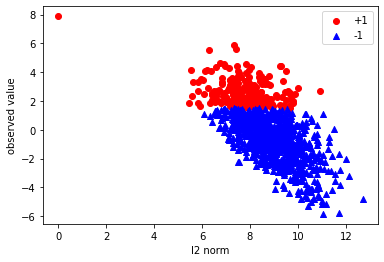

In [31]:
plt.scatter(dis1, val1, marker="o", color="red", label="+1")
plt.scatter(dis_1, val_1, marker="^", color="blue", label="-1")
plt.xlabel("l2 norm")
plt.ylabel("observed value")
plt.legend()
plt.show()

**6)** Make a similar plot but use the $l_{\infty}$ norm to compute the distance (Chebychev distance) [5 points]

In [32]:
dis_inf = [np.linalg.norm(X[i,:]-x_star,np.inf) for i in range(n)]
dis_inf[0:10]

[3.7009472895772735,
 4.014980837580955,
 4.251471191976604,
 4.18459468114941,
 3.0866606839516484,
 4.561644381530967,
 3.239154620914471,
 0.0,
 2.8037217708336675,
 2.949463317146782]

In [33]:
dis_inf1 = [dis_inf[i] for i in range(n) if Y[i]==1]
print(dis_inf1[0:5])
print(len(dis_inf1))

[0.0, 2.9066092610357934, 3.116750654980928, 3.466495807485832, 2.8561493146910806]
218


In [34]:
dis_inf_1 = [dis_inf[i] for i in range(n) if Y[i]==-1]
print(dis_inf_1[0:5])
print(len(dis_inf_1))

[3.7009472895772735, 4.014980837580955, 4.251471191976604, 4.18459468114941, 3.0866606839516484]
782


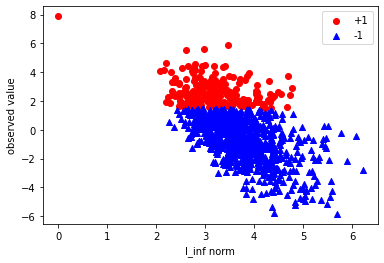

In [35]:
plt.scatter(dis_inf1, val1, marker="o", color="red", label="+1")
plt.scatter(dis_inf_1, val_1, marker="^", color="blue", label="-1")
plt.xlabel("l_inf norm")
plt.ylabel("observed value")
plt.legend()
plt.show()

**7)** For each of the distances, find the smallest $k$ such that the $k$-th nearest neighbor from the class-$1$ prototype is from the other class. Report the median of $k$ across $500$ random realizations (generatinga random $\tilde{Q}, \tilde{w}$, and $\tilde{s}$ on each realization and then generating the sample of size $1000$). Plot a histogram of $k$ across these $500$ runs. Which distance gives the smallest median value of $k$? [10 points]

In [36]:
def gen_X_Q_w(i):
    
    np.random.seed(i)
    G_ = np.random.normal(0,1,size=(p,p))
    norm = np.sqrt((G_ * G_).sum(axis=1))
    norm = norm.reshape(-1,1)
    G = G_ / norm
    Q = G@G.T
    mean = [0]*p
    cov = Q
    X = np.random.multivariate_normal(mean, cov, size=n)
    w = np.zeros((p,1))
    for i in range(r):
        w_ = np.random.uniform(1/3,1)
        s = 2*np.random.binomial(1,0.5)-1
        w[i] = s*w_
    sigma = 0.1*np.sqrt(w.T@Q@w)
    epsilon = np.random.normal(0,sigma,size=(n,1))
    Y_ = X@w + epsilon
    Y = np.sign(Y_ + eta)
    
    return X, Y, Y_, w

In [37]:
num_run = 500
list_X = []
list_Y = []
list_Y_ = []
list_w = []
for i in range(num_run):
    
    X,Y,Y_,w = gen_X_Q_w(i)
    list_X.append(X)
    list_Y.append(Y)
    list_Y_.append(Y_)
    list_w.append(w)

In [38]:
list_x_star = [list_X[i][np.argmax(list_Y_[i])] for i in range(num_run)]

In [39]:
# test K_NN
list_dis = [[i,np.linalg.norm(list_X[0][i,:]-list_x_star[0])] for i in range(n)]
print(list_dis[0:10])
sorted_list_dis = sorted(list_dis,key=lambda x: x[1])
print(sorted_list_dis[0:10])
k = -1 # prototype itself is included
for i in range(num_run):
    index = sorted_list_dis[i][0]
    if list_Y[0][index]==1:
        k=k+1
print(k)
index = sorted_list_dis[k][0]
print(list_Y[0][index])
index = sorted_list_dis[k+1][0]
print(list_Y[0][index])

[[0, 8.65785004321073], [1, 9.057434323851638], [2, 9.63453836711336], [3, 9.144037480143323], [4, 8.31135820977403], [5, 8.755156848104043], [6, 8.249062476320052], [7, 0.0], [8, 8.159684029677722], [9, 7.241932529001915]]
[[7, 0.0], [666, 5.456281317743153], [608, 5.55724937057857], [717, 5.5820501875036825], [200, 5.6170080155920505], [678, 5.814523438028064], [642, 5.8391983967421055], [302, 5.852167776870307], [622, 5.907468990692874], [926, 5.951764426367674]]
180
[1.]
[-1.]


In [40]:
list_k = []
for i in range(num_run):
    
    list_dis = [[k,np.linalg.norm(list_X[i][k,:]-list_x_star[i])] for k in range(n)]
    sorted_list_dis = sorted(list_dis,key=lambda x: x[1])
    
    k = -1 # prototype itself is included
    for j in range(num_run):
        index = sorted_list_dis[j][0]
        if list_Y[0][index]==1:
            k=k+1
    
    list_k.append(k)

In [41]:
print(list_k[0:10])

[180, 110, 107, 95, 109, 103, 101, 107, 96, 104]


Text(0, 0.5, 'Counts')

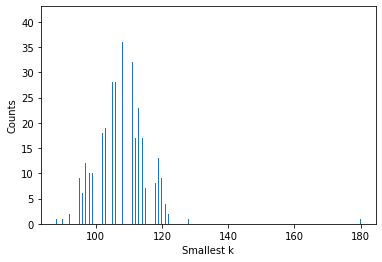

In [42]:
plt.hist(list_k, density=False, bins=500)  # density=False would make counts
plt.xlabel('Smallest k');
plt.ylabel("Counts")

The smallest median value of $k$ with respect to $l_2$ norm is

In [43]:
import statistics as st
print(st.median(list_k))

108.0


Do the same thing for $l_{\infty}$.

In [44]:
list_k_infty = []
for i in range(num_run):
    
    list_dis = [[k,np.linalg.norm(list_X[i][k,:]-list_x_star[i],np.inf)] for k in range(n)]
    sorted_list_dis = sorted(list_dis,key=lambda x: x[1])
    
    k = -1 # prototype itself is included
    for j in range(num_run):
        index = sorted_list_dis[j][0]
        if list_Y[0][index]==1:
            k=k+1
    
    list_k_infty.append(k)

In [45]:
print(list_k_infty[0:10])

[169, 104, 106, 110, 117, 109, 112, 102, 102, 111]


Text(0, 0.5, 'Counts')

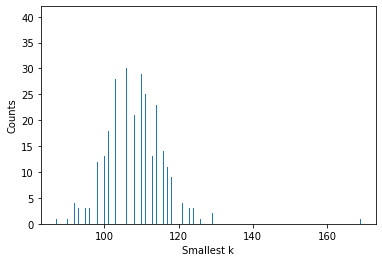

In [46]:
plt.hist(list_k_infty, density=False, bins=500)  # density=False would make counts
plt.xlabel('Smallest k');
plt.ylabel("Counts")

In [47]:
print(st.median(list_k_infty))

108.0


**8)** Which of the following metrics would be a poor choice of a distance/dissimilarity measure for a
$k$-nearest neighbor classifier in the presence of a large number of irrelevant features? Justify your
answer. [5 points]

Solution: $d_B$ is a poor metric as it is exactly the $l_{\infty}$. 

$d_A$ and $d_C$ are equivalent to $l_1$ norm and $d_D$ is $l_{1/10}$ norm. All of them are not bad for classification tasks.

**9)** Write a short 5–10 sentence discussion of the results and insights from these exercises. [5 points]

From figures in questions 6, we can see that data points are more closer to the class 1 prototype 
if we choose $l_\infty$ norm instead of $l_2$ norm. This makes sense because $\|x\|_{\infty}\leq\|x\|_2$ for any vector $x$. This means that using $l_\infty$ norm as a distance in classification tasks data points are more concentrated compared to using $l_2$ norm. So $l_{\infty}$ is not suitable for classification tasks, especially in high dimensional space. But the median values of $k$ in question 7 using $l_2$ and $l_\infty$ both are $108$ though the distributions of $k$ are different (from histogram). Means in this task $l_2$ does not show obvious advantage over $l_{\infty}$. Probably because the feature dimension is not very large so that the classification task is not very sensitive to the distance metric.

## Problem II

Notation: $u\sim\mathcal{N}(c,I_q), c\in R^q,A\in R^{d\times q}$

### 1)

First, calculate expectation of $A_{ij}$
\begin{align*}
E[A_{ij}]&=1\times p+0\times(1-2p)+(-1)\times p\\
&=0
\end{align*}

Then we have $E[A]=\left[E[A_{ij}]\right]_{d\times q}=0_{d\times q}$ as entries $A_{ij}$ in $A$ are independent of each other. In addtion, $A$ and $u$ are independent so we can switch the order between expecation and multiplication, that is,
\begin{align*}
E[Au]&=E[A]E[u]\\
&=0_{d\times q}c_{q\times1}\\
&=0_{d\times 1}
\end{align*}
Similarly,
\begin{align*}
E[A(u-c)]&=E[Au]-E[Ac]\\
&=E[A]E[u]-E[A]c\\
&=E[A]c-E[A]c\\
&=0_{d\times 1}
\end{align*}

### 2)
Note that $A$ and $A^T$ are not indepent as at least they share same diagonal entries. Let $C=AA^T$. Then
\begin{align*}
C_{ii}&=\sum_{j=1}^dA_{ij}(A^T)_{ji}\\
&=\sum_{j=1}^dA_{ij}^2
\end{align*}
From the probability mass function (pmf) of $A_{ij}$, we derive the pmf of $A_{ij}^2$,
$$A_{ij}^2=\begin{cases}
1&\text{with probability} 2p\\
0&\text{with probability }1-2p
\end{cases}$$
Then
\begin{align*}
E[A_{ij}^2]&=1\times(2p)+0\times(1-2p)\\
&=2p
\end{align*}
Since entries $A_{ij}$ are independent, $A_{ij}^2$ are independent, too.
\begin{align*}
E[C_{ii}]&=E\left[\sum_{j=1}^dA_{ij}^2\right]\\
&=\sum_{j=1}^dE\left[A_{ij}^2\right]\\
&=\sum_{j=1}^d2p\\
&=2dp
\end{align*}
For any $i,j$ with $\neq j$
\begin{align*}
C_{ij}&=\sum_{k=1}^dA_{ik}(A^T){kj}\\
&=\sum_{k=1}^dA_{ik}A_{jk}
\end{align*}
and then
\begin{align*}
E[C_{ij}]&=E\left[\sum_{k=1}^dA_{ik}A_{jk}\right]\\
&=\sum_{k=1}^dE[A_{ik}A_{jk}]\\
&\quad A_{ik},A_{jk}\text{ are independent}\\
&=\sum_{k=1}^dE[A_{ik}]E[A_{jk}]\\
&=\sum_{k=1}^d0\cdot0\\
&=0
\end{align*}
Therefore,
$$E[AA^T]=2dp I_{d}$$
where $I_d$ is the identity matrix of size $d\times d$.